# 600_emergent_capabilities_explortation

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### Let's start by getting the training sets and responses from each model into a usable format.

In [143]:
with open('../data/experiment_rerun/model_responses.json', 'r') as file:
    responses = json.load(file)
    

In [144]:
human_and_model_comments = {}
for model in responses.keys():
    human_and_model_comments[model] = {}
    human_and_model_comments[model]['video'] = responses[model]['video_title']
    #get response text
    model_comments = list(responses[model]['responses'].values())
    
    model_params = model.split('_')
    affil = model_params[0]
    size = model_params[1]
    with open(f'../data/final_ft_datasets/{affil}_size_{size}_train.jsonl') as file:
        lines=np.array(file.readlines())
        human_comments = list(np.vectorize(lambda x: eval(x)['messages'][2]['content'])(lines))
        
    human_and_model_comments[model]['comments'] = (human_comments, model_comments)

Let's start with some N-gram analysis

In [145]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import string
from gensim import corpora, models
from nltk.corpus import stopwords

In [146]:
for model, data in human_and_model_comments.items():
    print(model)
    print(data['video'])
    human, llm = data['comments']
    human_ngrams = []
    llm_ngrams = []
    tokenizer = RegexpTokenizer(r'\w+')
    for doc in human:
        tokens = tokenizer.tokenize(doc)
        for ng in list(ngrams(tokens, 2)):
            human_ngrams.append(ng)

    for doc in llm:
        tokens = tokenizer.tokenize(doc)
        for ng in list(ngrams(tokens, 2)):
            llm_ngrams.append(ng)

    differnce = set(llm_ngrams).difference(set(human_ngrams))
    
    training_set_concatenated = set(tokenizer.tokenize('\n'.join(human).lower()))
    for d in differnce:
        skip = False
        words = [*d]
        for word in words:
            if word.lower() in stopwords.words(): 
                skip = True
                break
        if not skip:
            skip = False
            for word in words:
                if word.lower() in training_set_concatenated:
                    skip = True
                    break
            if not skip:
                print(*d)
    print()

progressive_25
INSANE Interviews with MAGA Supporters
50 states
rural America
BLM TrumpTreason
watch holy
vague talking
blown insanity
TraitorTrump TrumpHasToGo
ancestors art
conversation witnessing
opposite sides
ImpeachTrumpNow Impeach45and50
open mind
ball abridged
TrumpCrimeSprees GOPSeditiousTraitors
ImpeachedTwice TrumpLiedPeopleDied
urban rural
BLM activists
small towns
vs Capitalism
24 hours
host 2
Nymphs January
lady pretend
ppl quit
showcase full
Impeach45and50 TrumpCrimeSprees
liberals grew
chief Move
reasonable country
watching dragon
public displays
targeted minorities
government policies
TrumpHasToGo sedition
escaped Authoritarianism
Week 382
TrumpTreason TrumpTheTraitor
resentment grew
2022 takeover
laughing lmfao
fake phone
Crazy world
vote Trump
opinions especially
Minimum wage
brain wormed
different requirements
rural divide
supported Trump
America great
dictator tomorrow
Sad Truth
necessarily disagree
presidential debates
January 6
Trump cult
alcohol poisin
Holy shit

In [147]:
for model, data in human_and_model_comments.items():
    print(model)
    print(data['video'])
    human, llm = data['comments']
    human_ngrams = []
    llm_ngrams = []
    tokenizer = RegexpTokenizer(r'\w+')
    for doc in human:
        tokens = tokenizer.tokenize(doc)
        for ng in list(ngrams(tokens, 3)):
            human_ngrams.append(ng)

    for doc in llm:
        tokens = tokenizer.tokenize(doc)
        for ng in list(ngrams(tokens, 3)):
            llm_ngrams.append(ng)

    differnce = set(llm_ngrams).difference(set(human_ngrams))
    
    training_set_concatenated = set(tokenizer.tokenize('\n'.join(human).lower()))
    for d in differnce:
        skip = False
        words = [*d]
        for word in words:
            if word.lower() in stopwords.words(): 
                skip = True
                break
        if not skip:
            skip = False
            for word in words:
                if word.lower() in training_set_concatenated:
                    skip = True
                    break
            if not skip:
                print(*d)
    print()

progressive_25
INSANE Interviews with MAGA Supporters
Nymphs January 6
watch holy crap
differing opinions especially
TRE45ON ImpeachTrumpNow Impeach45and50
TrumpLiedPeopleDied TraitorTrump TrumpHasToGo
quiet resentment grew
TrumpTheTraitor TRE45ON ImpeachTrumpNow
full blown insanity
vague talking points
TrumpHasToGo sedition SeditionCaucus
makes America great
sedition SeditionCaucus TrumpSupportersCanBeStupid
ImpeachedTwice TrumpLiedPeopleDied TraitorTrump
TraitorTrump TrumpHasToGo sedition
15hr Minimum wage
appointed dictator tomorrow
resentment grew louder
showcase full blown
ppl quit grouping
BLM TrumpTreason TrumpTheTraitor
block Sad Truth
Impeach45and50 TrumpCrimeSprees GOPSeditiousTraitors
watching dragon ball
presidential debates apparently
TrumpCrimeSprees GOPSeditiousTraitors TrumpIsALaughingStock
beliefs showcase full
ImpeachTrumpNow Impeach45and50 TrumpCrimeSprees
supported Trump reluctantly
fake phone conversation
GOPSeditiousTraitors TrumpIsALaughingStock ImpeachedTwice
Tr

#### Let's try topic modeling.

progressive_25
INSANE Interviews with MAGA Supporters


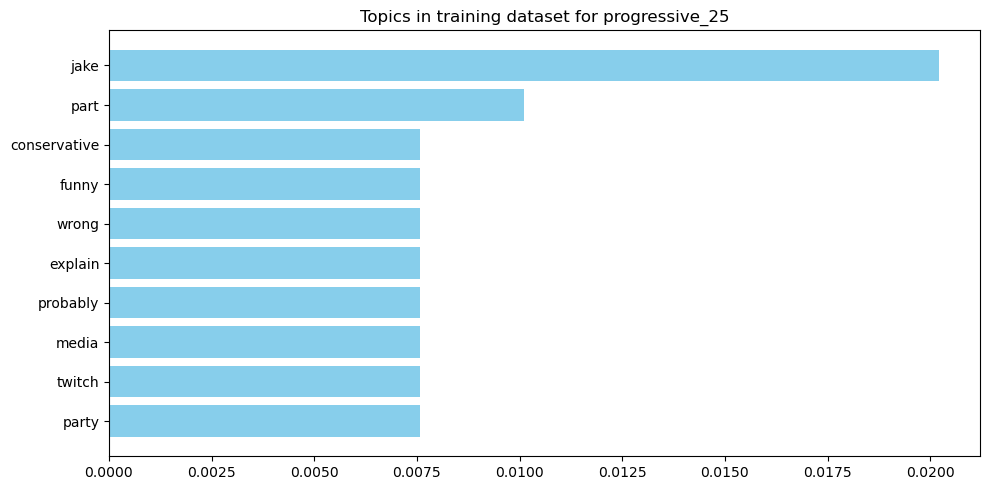

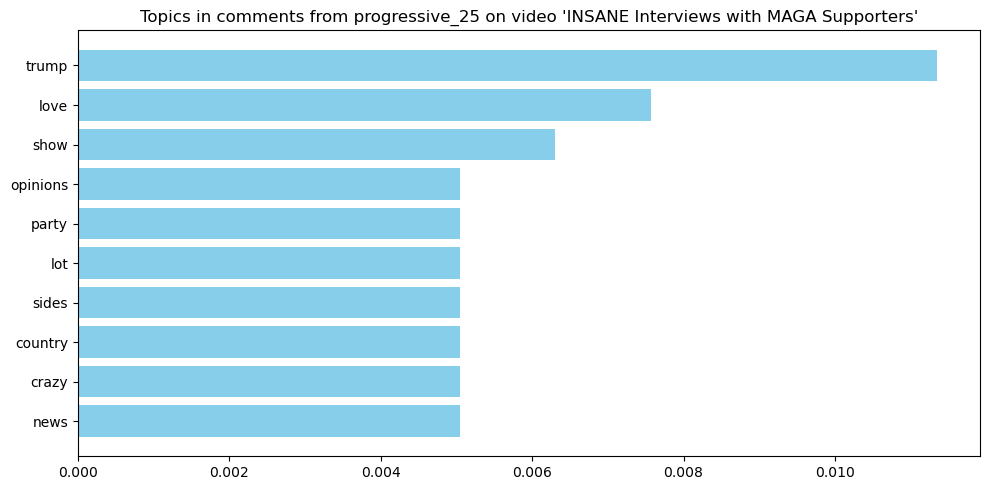

progressive_125
Trump’s FINAL Play to Steal the Election


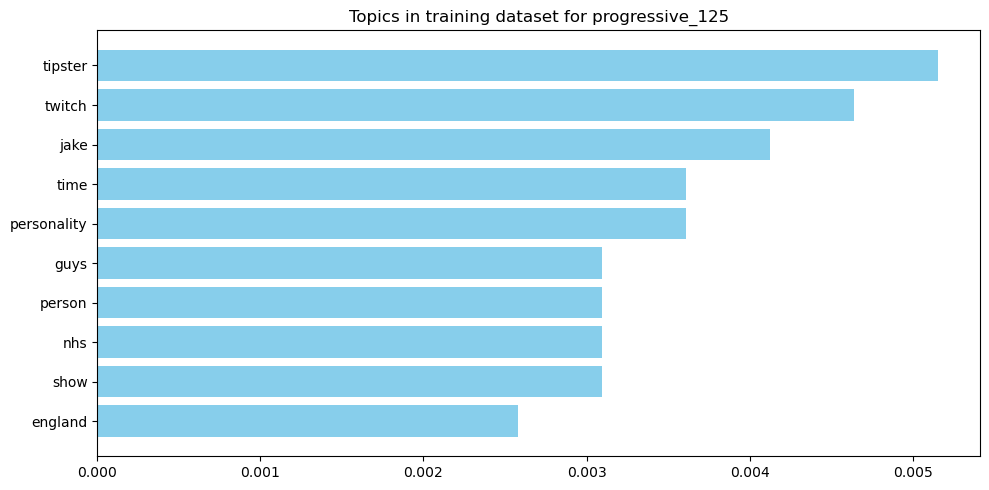

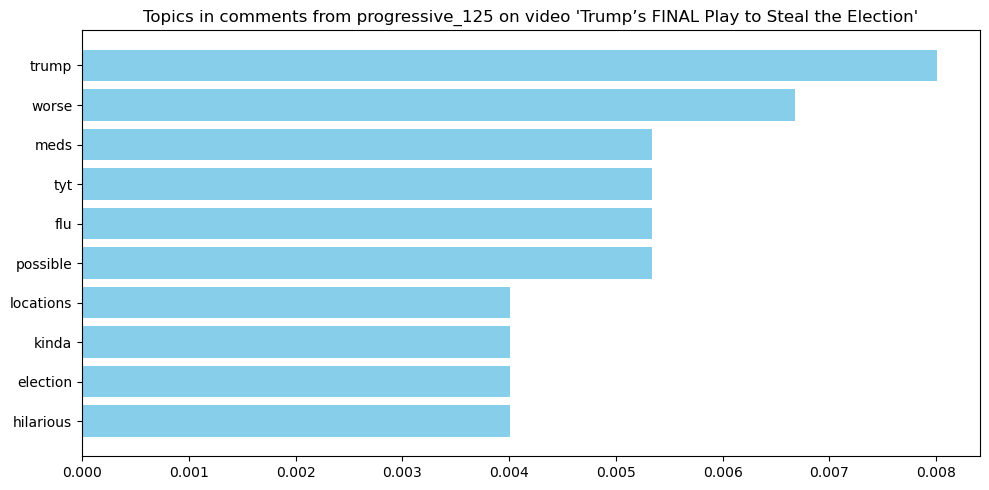

progressive_625
Trump’s FINAL Play to Steal the Election


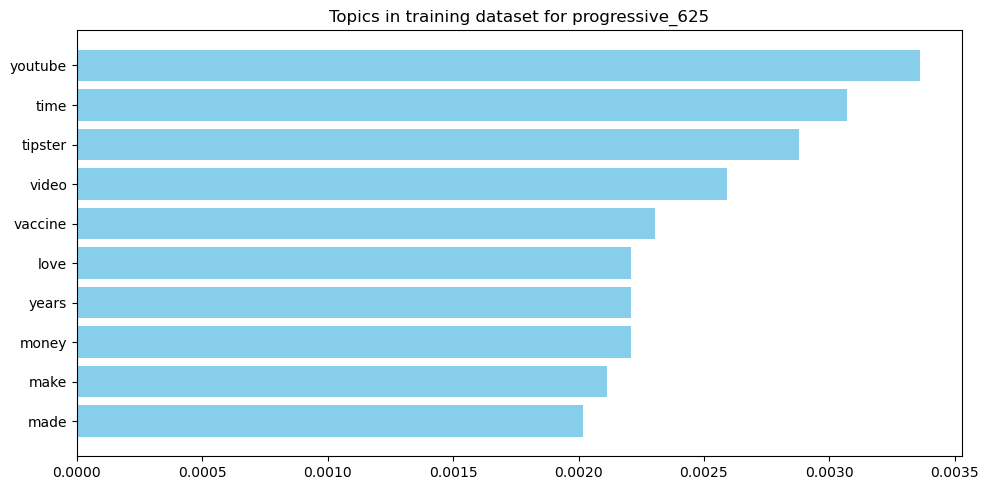

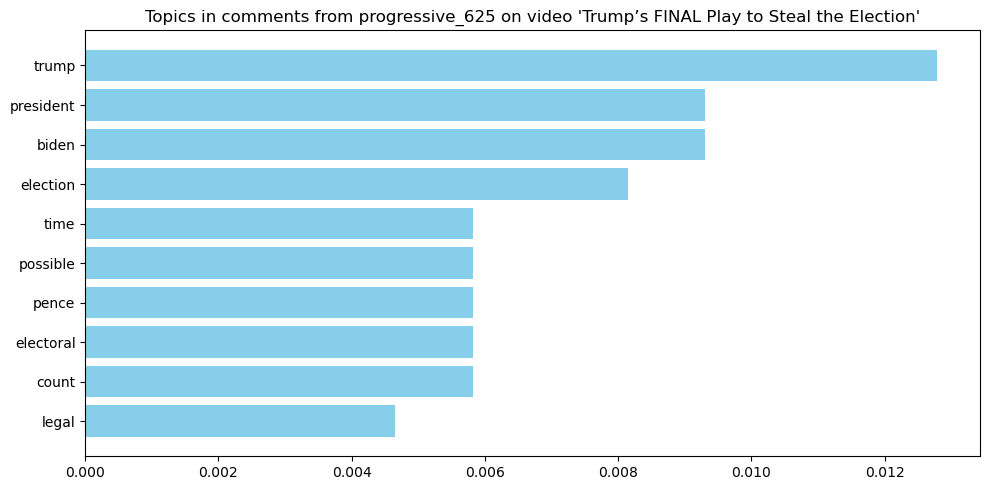

progressive_3125
Trump’s FINAL Play to Steal the Election


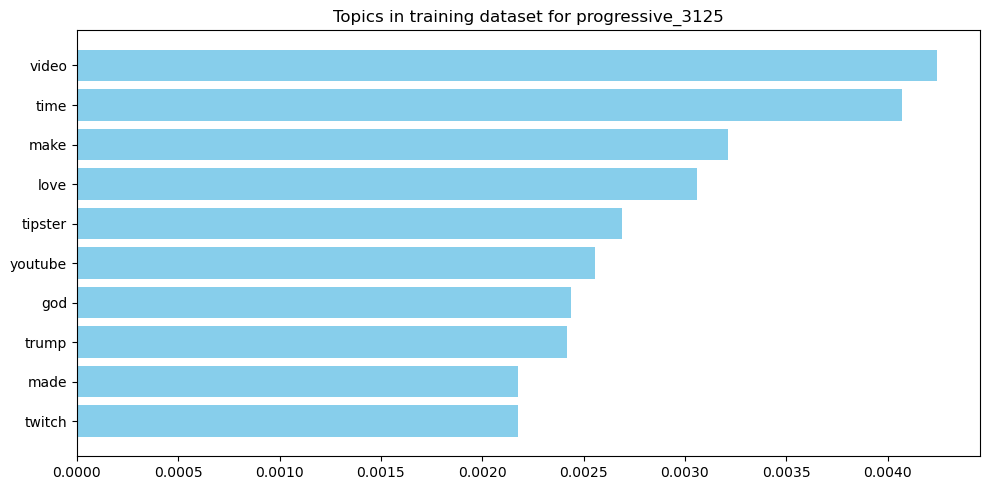

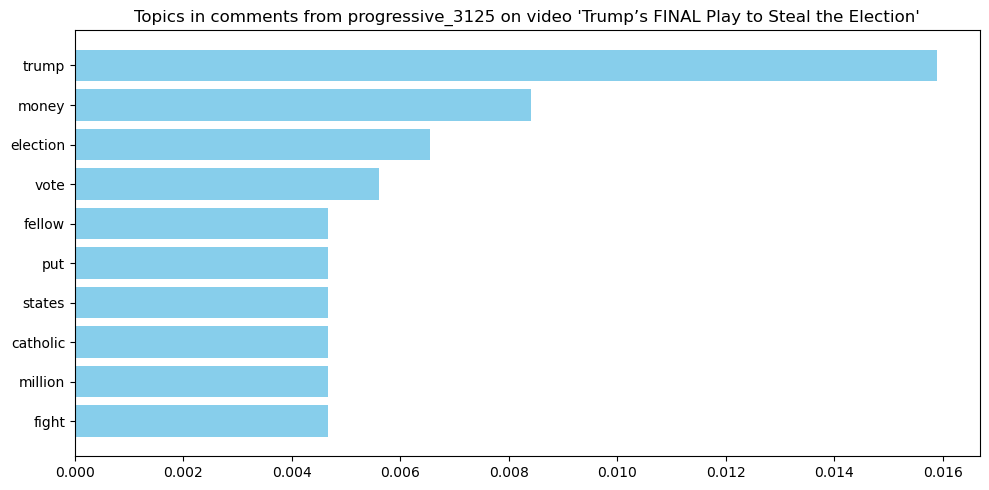

conservative_25
Madison Cawthorn On A New Conservative Movement | Urgent Message For A New Conservative Generation


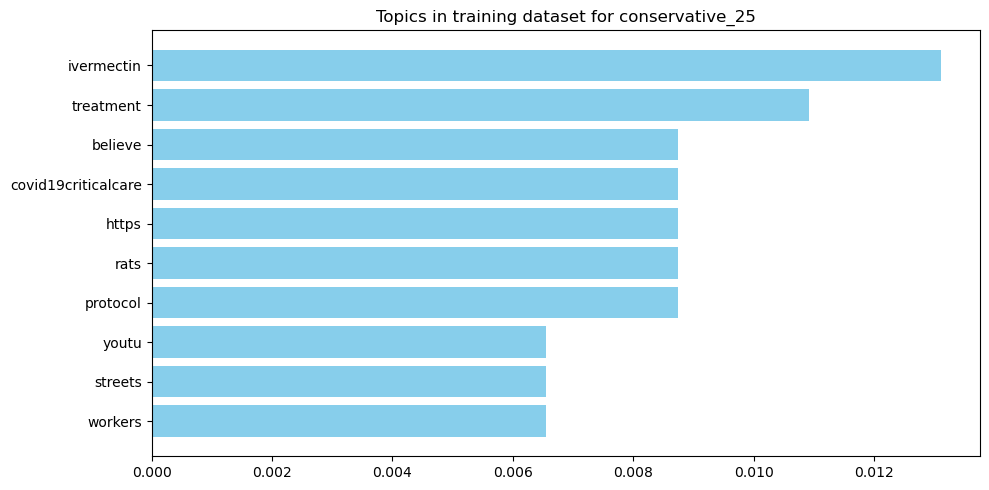

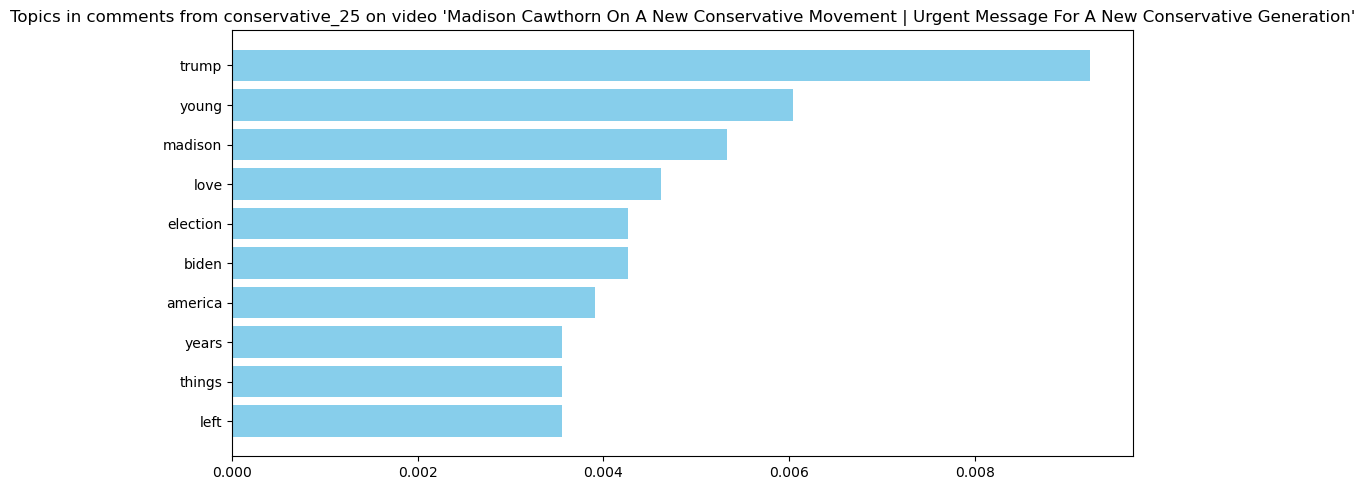

conservative_125
LEFTIST GROUPS RAGE IN PARIS...


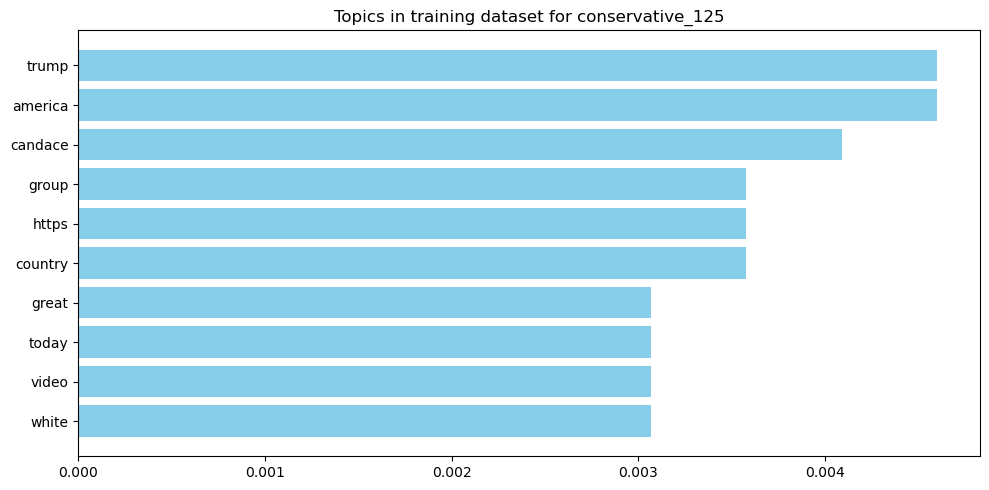

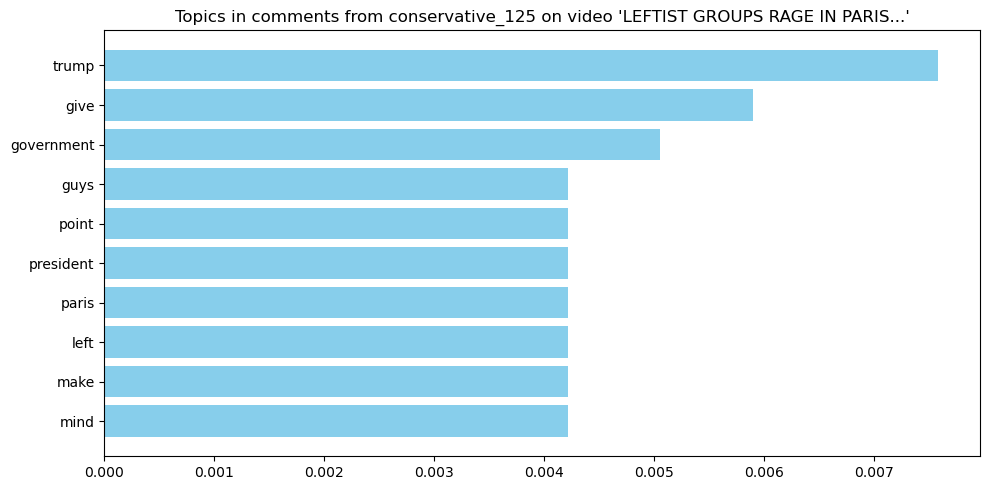

conservative_625
Charlie Kirk And Candace Owens Debunk "White Privilege"  | Angry Leftist Gets OWNED


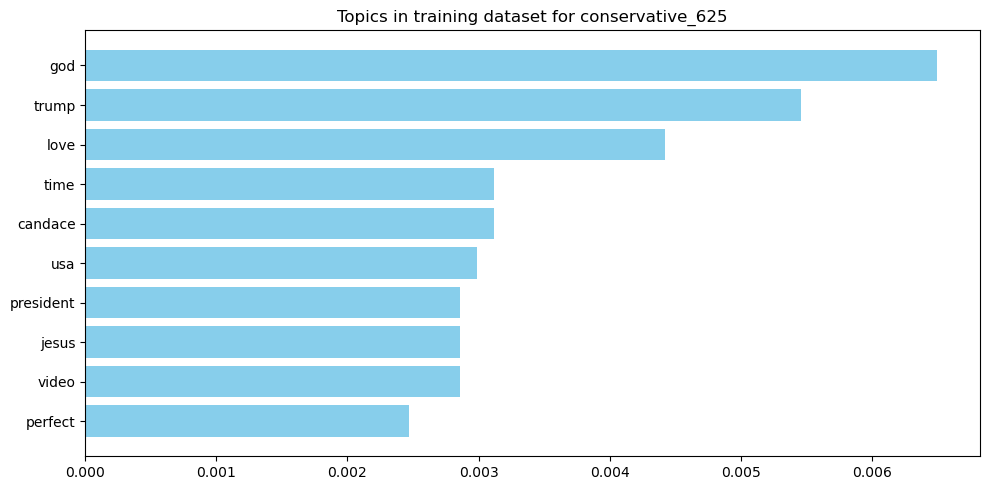

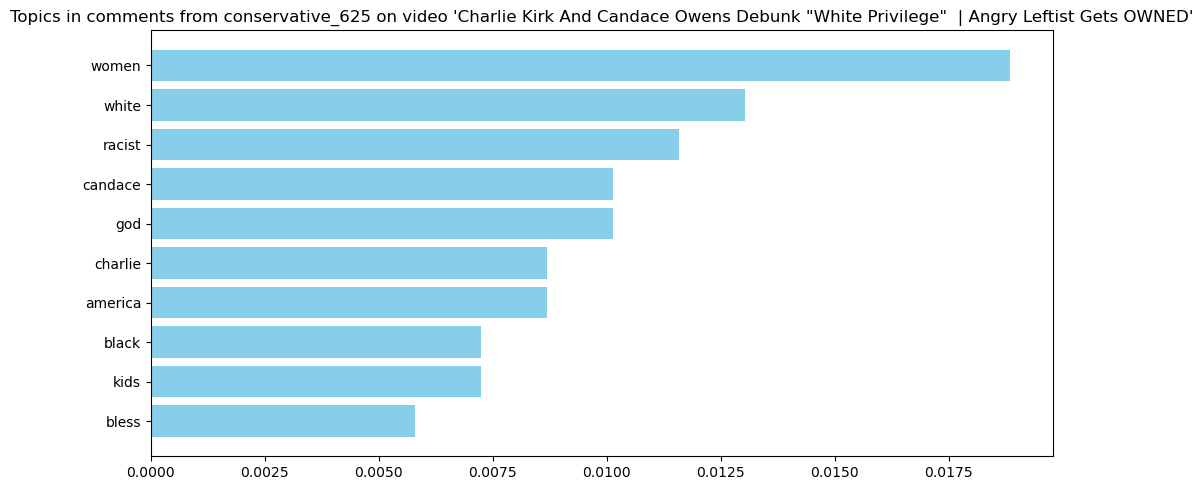

conservative_3125
Charlie Kirk And Candace Owens Debunk "White Privilege"  | Angry Leftist Gets OWNED


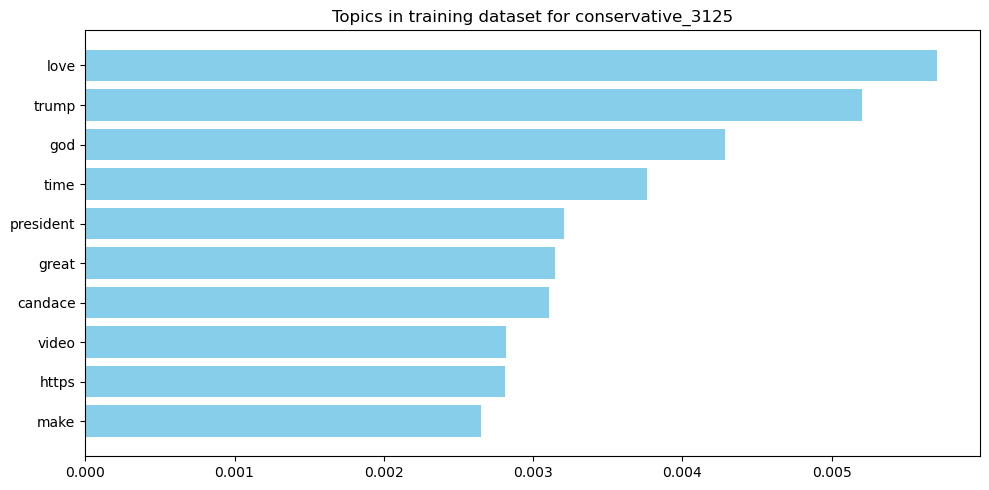

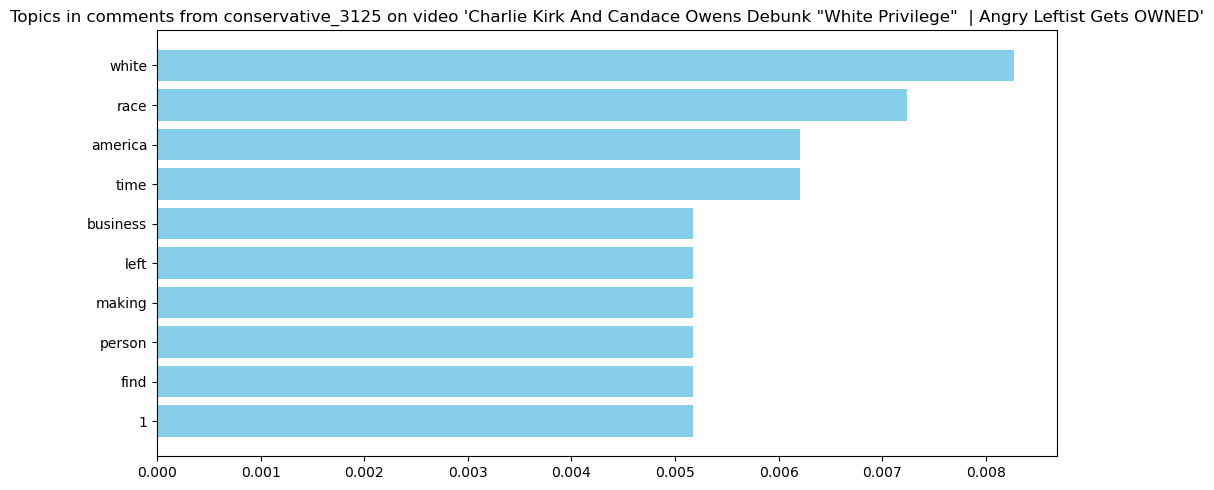

In [156]:
for model, data in human_and_model_comments.items():
    print(model)
    print(data['video'])
    human, llm = data['comments']  
    # Tokenize the texts
    human_docs_tokenized = [tokenizer.tokenize(doc.lower()) for doc in human]
    human_docs_tokenized = [[token for token in doc if token.lower() not in stopwords.words()] for doc in human_docs_tokenized]
    llm_docs_tokenized = [tokenizer.tokenize(doc.lower()) for doc in llm]
    llm_docs_tokenized = [[token for token in doc if token.lower() not in stopwords.words()] for doc in llm_docs_tokenized]

    # Create a dictionary representation of the documents
    human_dictionary = corpora.Dictionary(human_docs_tokenized)
    llm_dictionary = corpora.Dictionary(llm_docs_tokenized)

    # Convert dictionary to a bag of words corpus
    human_corpus = [human_dictionary.doc2bow(text) for text in human_docs_tokenized]
    llm_corpus = [llm_dictionary.doc2bow(text) for text in llm_docs_tokenized]
    
    # Apply LDA
    num_topics = 1
    human_lda = models.LdaModel(human_corpus, num_topics=num_topics, id2word=human_dictionary, passes=15)
    llm_lda = models.LdaModel(llm_corpus, num_topics=num_topics, id2word=llm_dictionary, passes=15)

    # Display the topics
    human_topics = human_lda.show_topics(num_topics=num_topics, num_words=10, formatted=False)
    # Structure topic information for plotting
    topic_dict = {}
    for topic_num, topic_words in human_topics:
        for word, probability in topic_words:
            if topic_num not in topic_dict:
                topic_dict[topic_num] = []
            topic_dict[topic_num].append((word, probability))

    # Example: Convert to DataFrame for easier plotting
    dfs = []
    for topic, word_probs in topic_dict.items():
        df = pd.DataFrame(word_probs, columns=['word', 'probability'])
        df['topic'] = topic
        dfs.append(df)

    # Combine all dataframes
    df_topics = pd.concat(dfs)
    
    fig, ax = plt.subplots(num_topics, 1, figsize=(10, num_topics * 5), sharey=True)
    # Filter the DataFrame
    df_filtered = df_topics[df_topics['topic'] == topic]
    # Sort by probability for better visualization
    df_filtered = df_filtered.sort_values('probability', ascending=True)
    # Plot
    ax.barh(df_filtered['word'], df_filtered['probability'], color='skyblue')
    ax.set_title(f'Topics in training dataset for {model}')

    plt.tight_layout()
    plt.show()
    
    llm_topics = llm_lda.show_topics(num_topics=num_topics, num_words=10, formatted=False)
    # Structure topic information for plotting
    topic_dict = {}
    for topic_num, topic_words in llm_topics:
        for word, probability in topic_words:
            if topic_num not in topic_dict:
                topic_dict[topic_num] = []
            topic_dict[topic_num].append((word, probability))

    # Example: Convert to DataFrame for easier plotting
    dfs = []
    for topic, word_probs in topic_dict.items():
        df = pd.DataFrame(word_probs, columns=['word', 'probability'])
        df['topic'] = topic
        dfs.append(df)

    # Combine all dataframes
    df_topics = pd.concat(dfs)
    
    fig, ax = plt.subplots(num_topics, 1, figsize=(10, num_topics * 5), sharey=True)
    # Filter the DataFrame
    df_filtered = df_topics[df_topics['topic'] == topic]
    # Sort by probability for better visualization
    df_filtered = df_filtered.sort_values('probability', ascending=True)
    # Plot
    ax.barh(df_filtered['word'], df_filtered['probability'], color='skyblue')
    ax.set_title(f'Topics in comments from {model} on video \'{data["video"]}\'')

    plt.tight_layout()
    plt.show()


In [157]:
llm_topics

[(0,
  [('white', 0.008273188),
   ('race', 0.0072390256),
   ('time', 0.0062048654),
   ('america', 0.0062048654),
   ('1', 0.0051707057),
   ('find', 0.0051707057),
   ('person', 0.0051707057),
   ('making', 0.0051707057),
   ('left', 0.0051707057),
   ('business', 0.0051707057)])]